In [48]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

pip install plotly

import glob
f = glob.glob("*.xlsx")

import glob
excel_files = glob.glob('C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/EUR JPY/Data/*.xlsx') # assume the path

#C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/Data EURUSD
for excel in excel_files:
    out = excel.split('.')[0]+'.csv'
    df = pd.read_excel(excel) # if only the first sheet is needed.
    df.to_csv(out) 

In [49]:
import pandas as pd
import glob

path = r'C:/Users/Hitesh/Desktop/LJMU/Forex Implementation/USD XAU/Data/' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=0)
    df.columns = ['Index','Timestamp','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote','Close_Bid_Quote','Volume']
    #df.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)
    li.append(df)

data = pd.concat(li, axis=0, ignore_index=True)

In [50]:
data.head(12)

,Index,Timestamp,Open_Bid_Quote,High_Bid_Quote,Low_Bid_Quote,Close_Bid_Quote,Volume
0,0,2010-01-03 18:01:00,1098.10,1099.55,1098.05,1099.55,0
1,1,2010-01-03 18:02:00,1099.60,1099.80,1099.05,1099.20,0
2,2,2010-01-03 18:03:00,1099.20,1099.75,1099.20,1099.70,0
3,3,2010-01-03 18:04:00,1099.80,1100.00,1099.65,1099.95,0
4,4,2010-01-03 18:05:00,1100.00,1100.30,1100.00,1100.05,0
5,5,2010-01-03 18:06:00,1100.05,1100.10,1099.65,1099.85,0
6,6,2010-01-03 18:07:00,1099.80,1099.80,1099.45,1099.55,0
7,7,2010-01-03 18:08:00,1099.55,1099.90,1099.55,1099.80,0
8,8,2010-01-03 18:09:00,1099.80,1099.85,1099.75,1099.75,0
9,9,2010-01-03 18:10:00,1099.70,1099.75,1099.65,1099.65,0


In [51]:
data['Timestamp'].min()

'2010-01-03 18:01:00'

In [52]:
data['Timestamp'].max()

'2021-06-30 23:58:00'

In [53]:
from datetime import datetime                                              
data['Timestamp'] = pd.to_datetime(data['Timestamp'])
data = data.set_index('Timestamp')

In [54]:
data = data.resample("H").max()

In [55]:
data.columns

Index(['Index', 'Open_Bid_Quote', 'High_Bid_Quote', 'Low_Bid_Quote',
       'Close_Bid_Quote', 'Volume'],
      dtype='object')

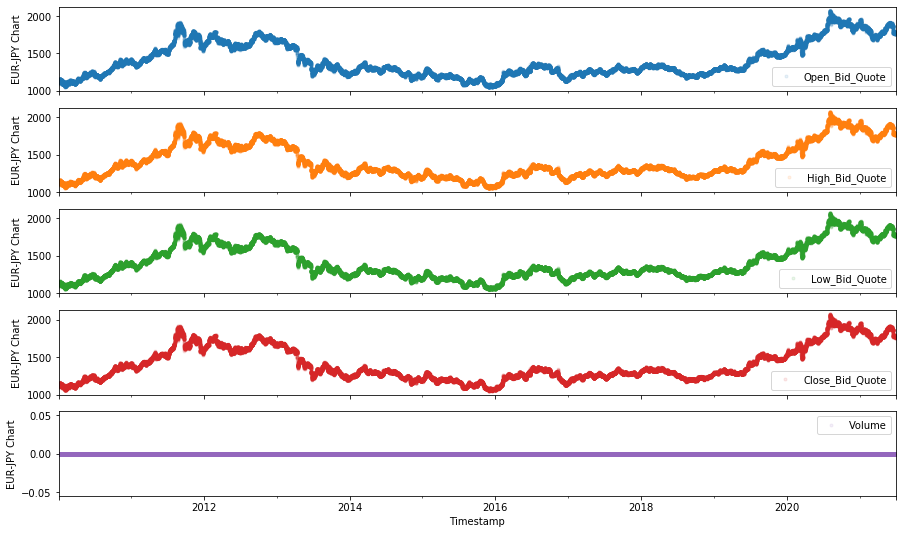

In [56]:
cols_plot = ['Open_Bid_Quote', 'High_Bid_Quote', 'Low_Bid_Quote','Close_Bid_Quote','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.1, linestyle='None', figsize=(15, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('EUR-JPY Chart')

Text(0, 0.5, 'EUR-JPY Chart - 2019')

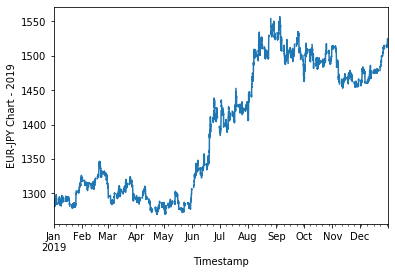

In [57]:
ax = data.loc['2019', 'Close_Bid_Quote'].plot()
ax.set_ylabel('EUR-JPY Chart - 2019')

Text(0, 0.5, 'EUR-JPY Chart - 2019July-2019Sep')

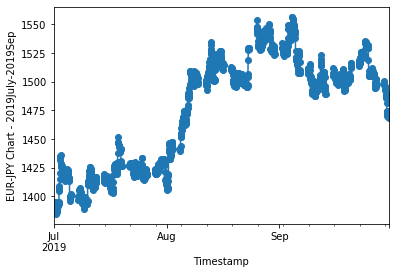

In [58]:
ax = data.loc['2019-07':'2019-09', 'Close_Bid_Quote'].plot(marker='o', linestyle='-')
ax.set_ylabel('EUR-JPY Chart - 2019July-2019Sep')

In [59]:
data.isnull().sum()/len(data)*100

Index              31.365306
Open_Bid_Quote     31.365306
High_Bid_Quote     31.365306
Low_Bid_Quote      31.365306
Close_Bid_Quote    31.365306
Volume             31.365306
dtype: float64

In [60]:
int(len(data['Close_Bid_Quote']))

100710

In [61]:
data[data['Close_Bid_Quote'].isnull()]

,Index,Open_Bid_Quote,High_Bid_Quote,Low_Bid_Quote,Close_Bid_Quote,Volume
Timestamp,,,,,,
2010-01-08 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 19:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-08 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2021-06-27 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-27 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-28 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
data.drop(columns=['Index','Volume','Open_Bid_Quote','High_Bid_Quote','Low_Bid_Quote'],inplace=True)

import mplfinance as fplt

import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=data['Timestamp'],
                close=data['Close_Bid_Quote'])])

fig.show()


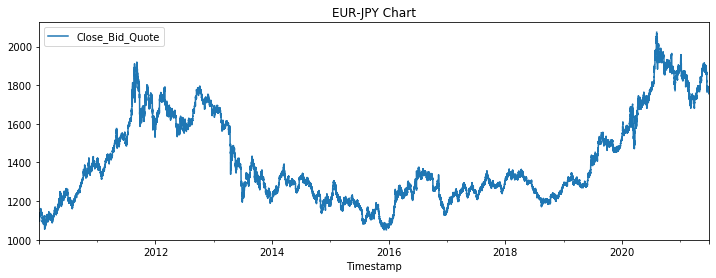

In [63]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart')
plt.show(block=False)

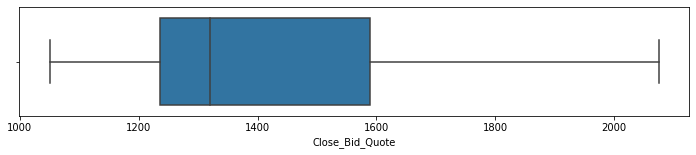

In [64]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data['Close_Bid_Quote'],whis=1.5)

In [65]:
data.columns

Index(['Close_Bid_Quote'], dtype='object')

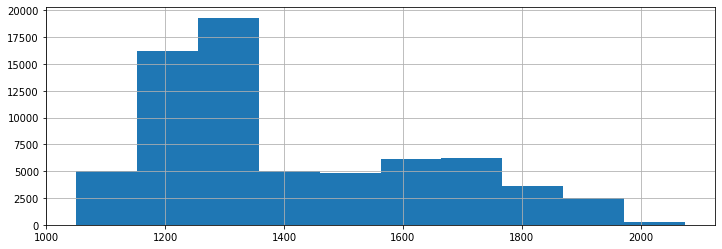

In [66]:
fig = data.Close_Bid_Quote.hist(figsize = (12,4))

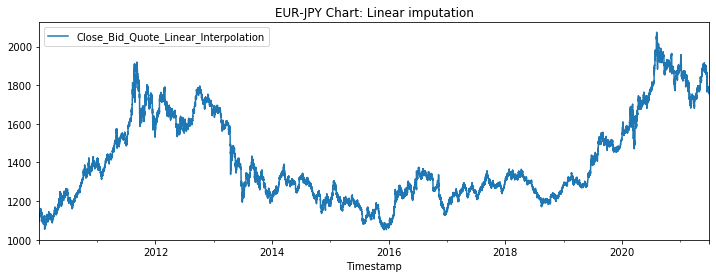

In [67]:
data = data.assign(Close_Bid_Quote_Linear_Interpolation=data.Close_Bid_Quote.interpolate(method='linear'))
data[['Close_Bid_Quote_Linear_Interpolation']].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart: Linear imputation')
plt.show(block=False)

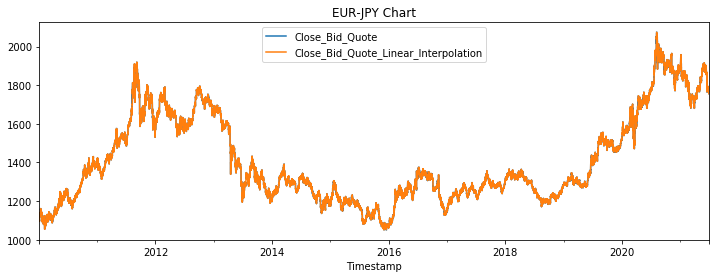

In [68]:
data.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('EUR-JPY Chart')
plt.show(block=False)

In [69]:
data.drop(columns=['Close_Bid_Quote'],inplace=True)

In [70]:
data

,Close_Bid_Quote_Linear_Interpolation
Timestamp,
2010-01-03 18:00:00,1100.050
2010-01-03 19:00:00,1096.400
2010-01-03 20:00:00,1095.630
2010-01-03 21:00:00,1098.880
2010-01-03 22:00:00,1099.080
...,...
2021-06-30 19:00:00,1770.028
2021-06-30 20:00:00,1768.328
2021-06-30 21:00:00,1771.845


In [71]:
data=data.rename(columns={"Close_Bid_Quote_Linear_Interpolation": "Close_Bid_Quote"}, errors="raise")

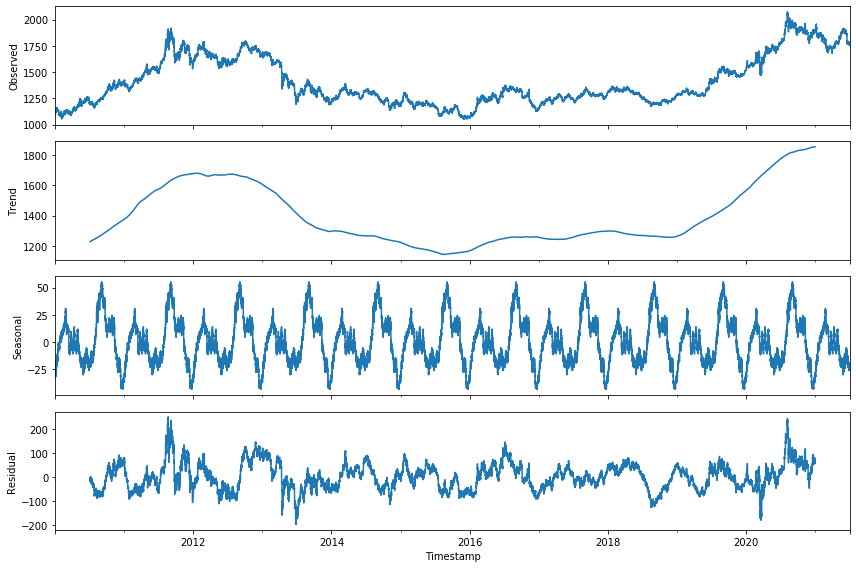

In [72]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(data.Close_Bid_Quote, model='additive',freq=8760) # additive seasonal index
fig = decomposition.plot()
plt.show()

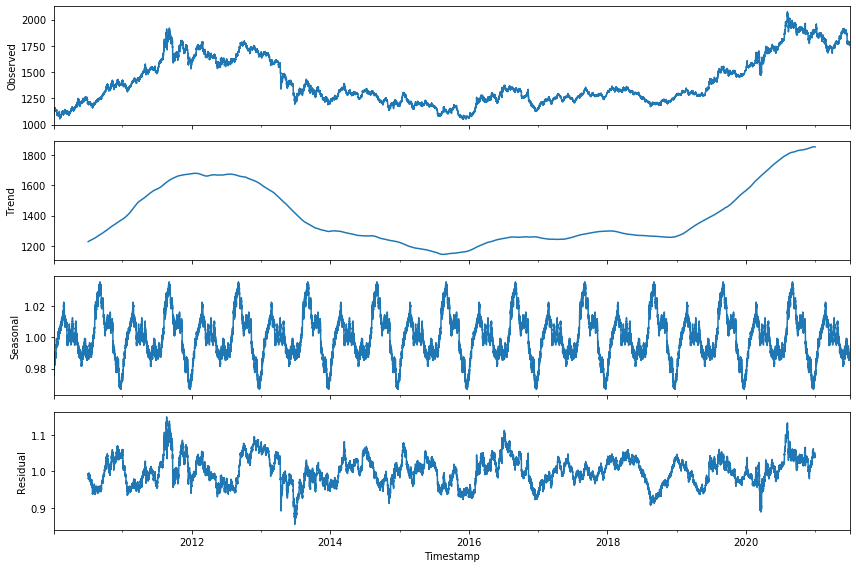

In [73]:
decomposition = sm.tsa.seasonal_decompose(data.Close_Bid_Quote, model='multiplicative',freq=8760) # multiplicative seasonal index
fig = decomposition.plot()
plt.show()

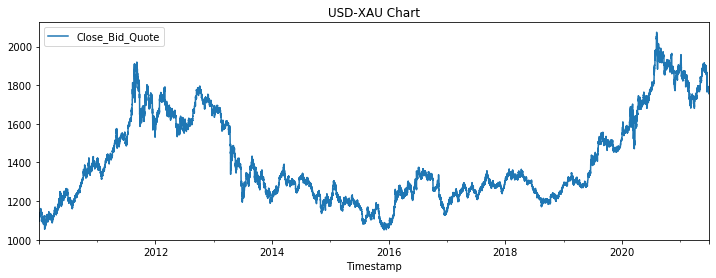

In [74]:
data['Close_Bid_Quote'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('USD-XAU Chart')
plt.show(block=False)

In [75]:
int(len(data['Close_Bid_Quote'])*80/100)

80568

In [76]:
train_len = int(len(data['Close_Bid_Quote'])*80/100)
train = data[0:train_len] # first 120 months as training set
test = data[train_len:] # last 24 months as out-of-time test set

In [77]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(data['Close_Bid_Quote'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.574000
Critical Values @ 0.05: -2.86
p-value: 0.496640


In [78]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(data['Close_Bid_Quote'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 21.095013
Critical Values @ 0.05: 0.46
p-value: 0.010000


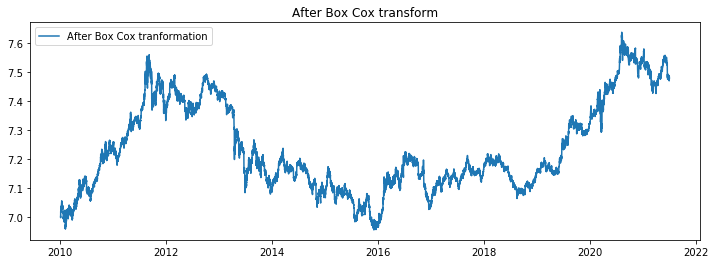

In [79]:
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(data['Close_Bid_Quote'], lmbda=0), index = data.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

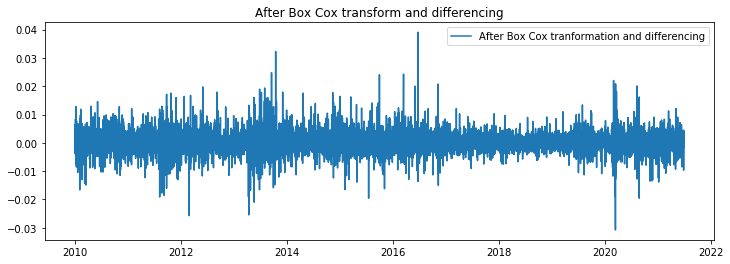

In [80]:
data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), data.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

In [81]:
data_boxcox_diff.dropna(inplace=True)

In [82]:
data_boxcox_diff.tail()

Timestamp
2021-06-30 19:00:00    0.000036
2021-06-30 20:00:00   -0.000961
2021-06-30 21:00:00    0.001987
2021-06-30 22:00:00    0.001771
2021-06-30 23:00:00    0.000480
Freq: H, dtype: float64

In [83]:
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -43.521287
Critical Values @ 0.05: -2.86
p-value: 0.000000


In [84]:
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.127644
Critical Values @ 0.05: 0.46
p-value: 0.100000


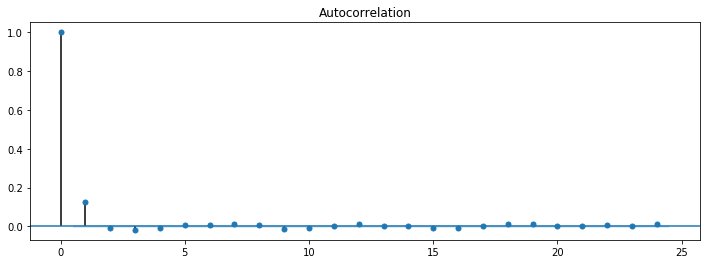

In [85]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(12,4))
plot_acf(data_boxcox_diff, ax=plt.gca(), lags = 24)
plt.show()

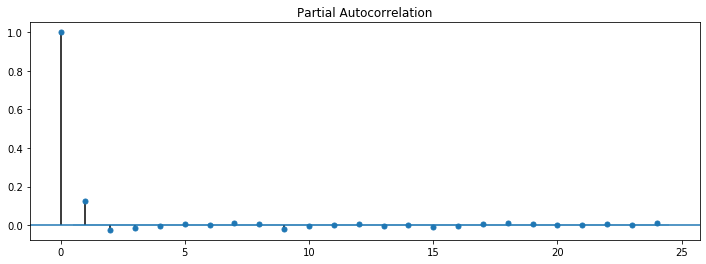

In [86]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(12,4))
plot_pacf(data_boxcox_diff, ax=plt.gca(), lags = 24)
plt.show()

In [87]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

In [88]:
train_data_boxcox_diff

Timestamp
2010-01-03 19:00:00   -0.003324
2010-01-03 20:00:00   -0.000703
2010-01-03 21:00:00    0.002962
2010-01-03 22:00:00    0.000182
2010-01-03 23:00:00    0.002680
                         ...   
2019-03-14 13:00:00    0.000480
2019-03-14 14:00:00   -0.000072
2019-03-14 15:00:00   -0.000532
2019-03-14 16:00:00    0.000198
2019-03-14 17:00:00    0.000198
Freq: H, Length: 80567, dtype: float64

In [89]:
from statsmodels.tsa.arima_model import ARIMA

In [91]:
model = ARIMA(train_data_boxcox, order=(1, 1, 1))
model_fit = model.fit()
print(model_fit.params)

const        0.000002
ar.L1.D.y   -0.055950
ma.L1.D.y    0.174115
dtype: float64


In [92]:
y_hat_arima = data_boxcox_diff.copy()

In [93]:
data_boxcox_diff.index.min()

Timestamp('2010-01-03 19:00:00', freq='H')

In [94]:
data_boxcox_diff.index.max()

Timestamp('2021-06-30 23:00:00', freq='H')

In [95]:
data_boxcox_diff

Timestamp
2010-01-03 19:00:00   -0.003324
2010-01-03 20:00:00   -0.000703
2010-01-03 21:00:00    0.002962
2010-01-03 22:00:00    0.000182
2010-01-03 23:00:00    0.002680
                         ...   
2021-06-30 19:00:00    0.000036
2021-06-30 20:00:00   -0.000961
2021-06-30 21:00:00    0.001987
2021-06-30 22:00:00    0.001771
2021-06-30 23:00:00    0.000480
Freq: H, Length: 100709, dtype: float64

In [96]:
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

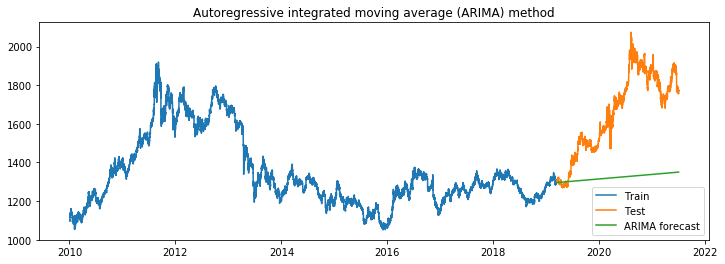

In [97]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method')
plt.show()

In [98]:
test.index.min()

Timestamp('2019-03-14 18:00:00', freq='H')

In [99]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_arima['arima_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

results =pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })

results = results[['Method', 'RMSE', 'MAPE']]

results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,386.5,19.09


In [100]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12),freq='H', initialization='approximate_diffuse') 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.070251
ma.L1       0.188923
ar.S.L12   -0.018830
ma.S.L12   -0.725741
sigma2      0.000004
dtype: float64


In [101]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

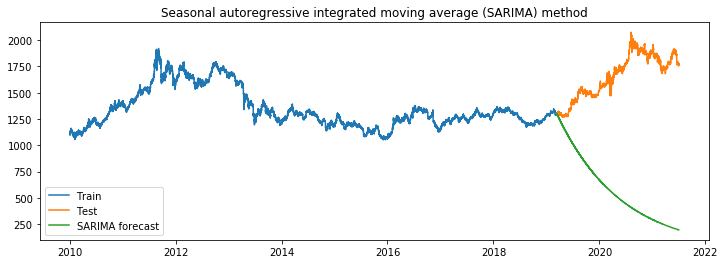

In [102]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method')
plt.show()

In [103]:
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,386.50,19.09
0,Seasonal autoregressive integrated moving aver...,1189.16,61.98


In [105]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12), exog=train,initialization='approximate_diffuse') 
model_fit = model.fit()
print(model_fit.params)

Close_Bid_Quote    7.122528e-04
ar.L1             -1.231492e-01
ma.L1              2.570938e-01
ar.S.L12          -2.129166e-02
ma.S.L12          -7.200005e-01
sigma2             5.476667e-08
dtype: float64


In [106]:
y_hat_sarimax = data_boxcox_diff.copy()
y_hat_sarimax['sarimax_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max(), exog=test)
y_hat_sarimax['sarimax_forecast'] = np.exp(y_hat_sarimax['sarimax_forecast_boxcox'])

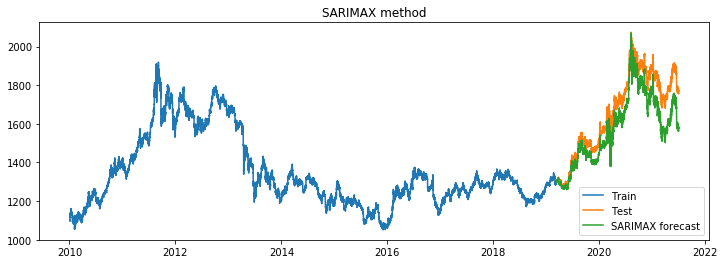

In [107]:
plt.figure(figsize=(12,4))
plt.plot(train['Close_Bid_Quote'], label='Train')
plt.plot(test['Close_Bid_Quote'], label='Test')
plt.plot(y_hat_sarimax['sarimax_forecast'][test.index.min():], label='SARIMAX forecast')
plt.legend(loc='best')
plt.title('SARIMAX method')
plt.show()

In [108]:
rmse = np.sqrt(mean_squared_error(test['Close_Bid_Quote'], y_hat_sarimax['sarimax_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Close_Bid_Quote']-y_hat_sarimax['sarimax_forecast'][test.index.min():])/test['Close_Bid_Quote'])*100,2)

tempResults = pd.DataFrame({'Method':['SARIMAX method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Autoregressive integrated moving average (ARIM...,386.50,19.09
0,Seasonal autoregressive integrated moving aver...,1189.16,61.98
0,SARIMAX method,98.78,4.95
